# Boston Data Set Analysis

The Boston housing data set represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts in 506 entries. It was collected in 1978 and presents the Median home values of Boston with associated home and neighborhood attributes.

In [1]:
#Import basic packages
# For numerical arrays.
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
import sklearn
# For data frames.
import pandas as pd
# For neural networks.
import keras as kr
import seaborn as sns 
# For preprocessing data.
import sklearn.preprocessing as pre
# For splitting data sets.
import sklearn.model_selection as mod
# For whitening.
import sklearn.decomposition as dec

%matplotlib inline

Using TensorFlow backend.


In [2]:
#Import Boston data set
from sklearn.datasets import load_boston
boston = load_boston()

In [3]:
#Show the description of the dataset
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
#Number of rows and columns in the dataset
print(boston.data.shape)

(506, 13)


In [5]:
#Column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
#Converting the dataset to pandas
bostondf = pd.DataFrame(boston.data)
#showing the first column as column names
bostondf.columns = boston.feature_names

#printing the data set
bostondf

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [7]:
#Printing the column target (Price)
target = pd.DataFrame(boston.target)
target

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


In [8]:
bostondf.mean()

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
DIS          3.795043
RAD          9.549407
TAX        408.237154
PTRATIO     18.455534
B          356.674032
LSTAT       12.653063
dtype: float64

In [9]:
#Adding the target column (Price) to be shown in the dataset


bostondf['MEDV'] = boston.target

#printing the first rows of the dataset
print(bostondf.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  


In [10]:
#summary of the boston data set
print(bostondf.describe())


             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

### Descriptive statistics
Descriptive statistics uses tools like mean and standard deviation on a sample to summarize data.

<function matplotlib.pyplot.show(*args, **kw)>

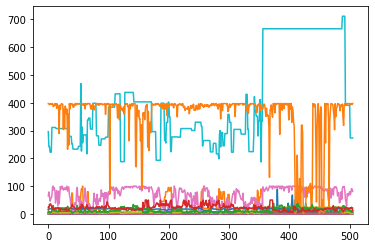

In [11]:
plt.plot(bostondf)
plt.show

In [12]:
price= boston.target
price.mean()

22.532806324110677

In [13]:
# Using pyplot to plot the prices
boston['chas'] = boston.indus

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['chas'], bins=30)
plt.show()

AttributeError: indus

In [ ]:
#code adapted from towardsdatascience.com
#show linear correlations between variables
plt.figure(figsize = (18,18))
correlation_matrix = bostondf.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

### Correlations
The correlation coefficient ranges from -1 to 1. If the value is close to 1, it means that there is a strong positive correlation between the two variables. When it is close to -1, the variables have a strong negative correlation.

The Boston data set heatmap presents strong possitive correlation between the index of accessibility to radial highways (RAD) and the full-value property-tax rate per $10,000 (TAX). Furthermore, there is a possitive relationship between nitric oxides concentration (NOX) and proportion of non-retail business acres per town (INDUS).
Exists as well a positive correltion between Median value of owner-occupied homes in $1000's and average number of rooms per dwelling (RM).

On the other hand, there is strong negative correlations between weighted distances to five Boston employment centres (DIS) and nitric oxides concentration (parts per 10 million) (NOX). Also strong negative correlation between weighted distances to five Boston employment centres (DIS) and proportion of owner-occupied units built prior to 1940 (AGE). 
Moreover there is negative correlation between Median value of owner-occupied homes in $1000's (MEDV) and % lower status of the population (LSTAT).

Negative correlation as well between proportion of non-retail business acres per town (INDUS) and weighted distances to five Boston employment centres (DIS)

 :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

In [ ]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['CRIM', 'AGE']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['ZN', 'INDUS']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [ ]:
#Getting the info of the houses that face the river
S = bostondf['ZN']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(S, color="y", bins=30)
plt.show()

In [ ]:
#Getting the info of the houses that face the river
S = bostondf['INDUS']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(S, color="y", bins=30)
plt.show()

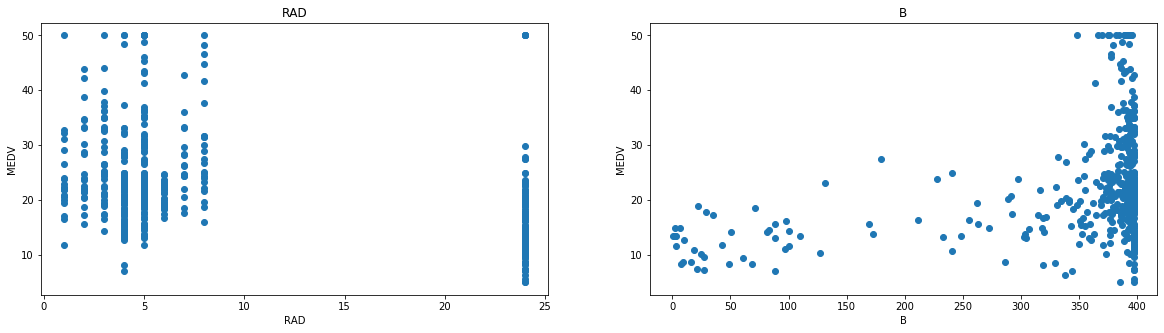

In [14]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting RM and MEDV strong positive correlation
plt.figure(figsize=(20, 5))

features = ['RAD', 'B']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

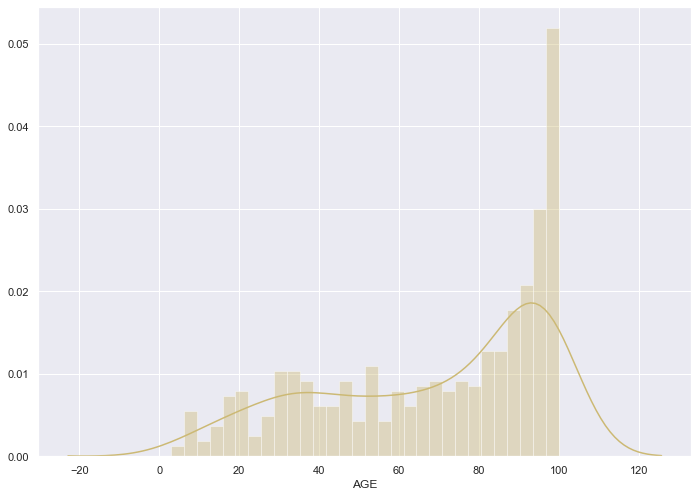

In [15]:
#Getting the info of the houses that face the river
S = bostondf['AGE']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(S, color="y", bins=30)
plt.show()

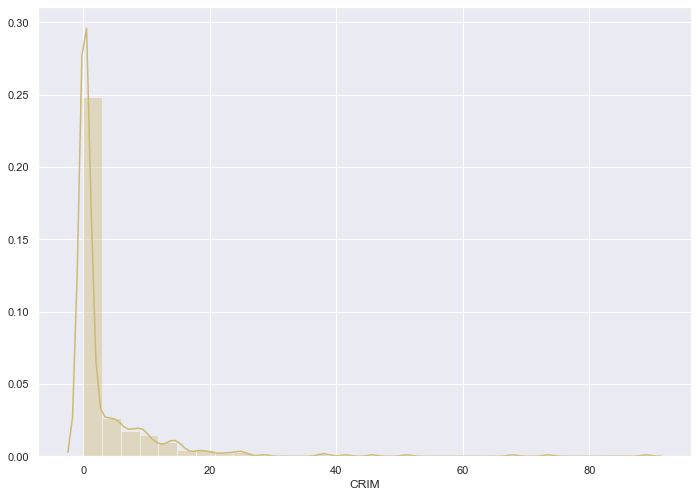

In [16]:
#Getting the info of the houses that face the river
S = bostondf['CRIM']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(S, color="y", bins=30)
plt.show()

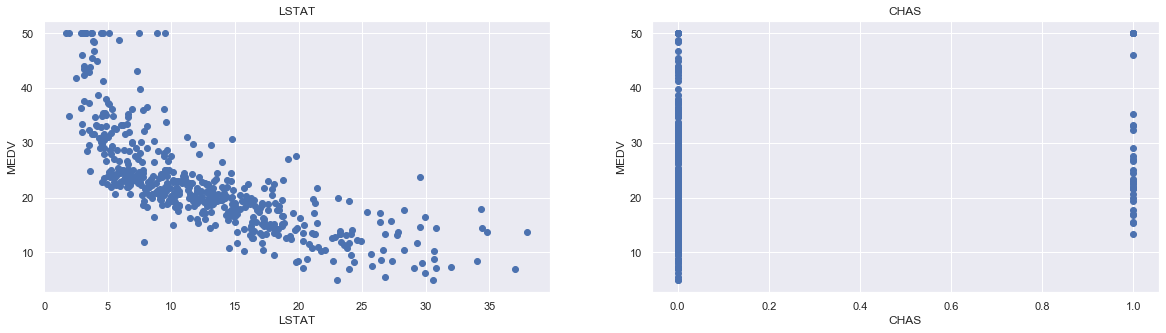

In [17]:
#code adapted from towardsdatascience.com
#ploting LSTAT and MEDV high negative correlation and ploting CHAS and MEDV no strong correlation
plt.figure(figsize=(20, 5))

features = ['LSTAT','CHAS']
target = bostondf['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bostondf[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

## Inferential statistics

Inferential statistics allows you to make predictions (“inferences”) from the data, while descriptive statistics describes data (for example, a chart or graph). With inferential statistics, you take data from samples and make generalizations about a population.

There are two main areas of inferential statistics:

Estimating parameters. This means taking a statistic from your sample data (for example the sample mean) and using it to say something about a population parameter (i.e. the population mean).
Hypothesis tests. This is where you can use sample data to answer research questions. 

Example of descriptive statistics:

Sample mean
Sample standard deviation
Making a bar chart or boxplot
Describing the shape of the sample probability distribution
dependent variable.
A bar graph is one way to summarize data in descriptive statistics. Source: NIH.GOV.




With inferential statistics a sample data from a small number of people is taken and and try to determine if the data can predict whether the drug will work for everyone (i.e. the population). There are various ways you can do this, from calculating a z-score (z-scores are a way to show where your data would lie in a normal distribution to post-hoc (advanced) testing.
hypothesis testing example
A hypothesis test can show where your data is placed on a distribution like this one.

Inferential statistics use statistical models to help you compare your sample data to other samples or to previous research. Most research uses statistical models called the Generalized Linear model and include Student’s t-tests, ANOVA (Analysis of Variance), regression analysis and various other models that result in straight-line (“linear”) probabilities and results.

Regression

In [18]:
River = bostondf['CHAS']
np.polyfit(River, price,1)


array([ 6.34615711, 22.09384289])

In [19]:
#identifying the correlation between the values and MEDV (price)
correlation_matrix = bostondf.corr().round(2)


price_correlation = correlation_matrix.iloc[:,13:14]

price_correlation

,MEDV
CRIM,-0.39
ZN,0.36
INDUS,-0.48
CHAS,0.18
NOX,-0.43
RM,0.70
AGE,-0.38
DIS,0.25
RAD,-0.38
TAX,-0.47


The correlation between MEDV (price of the house) and CHAS (if the house tract bounds river) is the lower correlation attending to the price variable. This shows that there is not a significant difference in median house prices between houses that are along the Charles river and those that aren’t. That variable has a very low correlation with price.

Analysis on regression methods and suitability to find the relationship between the median house price and whether the house borders the river.


T-tests
we could t-test that with the following null hypothesis if the houses close to the river. A starting point id showing if the data follows a normal distrbution with the following hypothesis:

H0: The price data are sampled from a normal distribution

H1: The price data are not sampled from a normal distribution.

And then test the same hypothesis for the river variable.

H0: The data are sampled from a normal distribution

H1: The data are not sampled from a normal distribution.

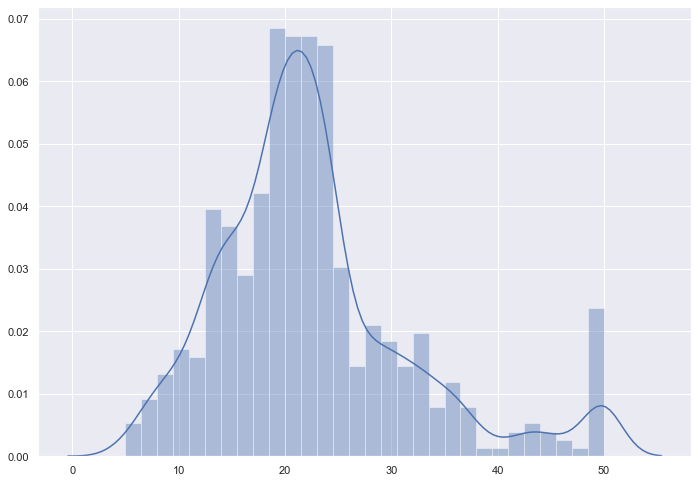

In [20]:
# Using pyplot to plot the prices
boston['MEDV'] = boston.target

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

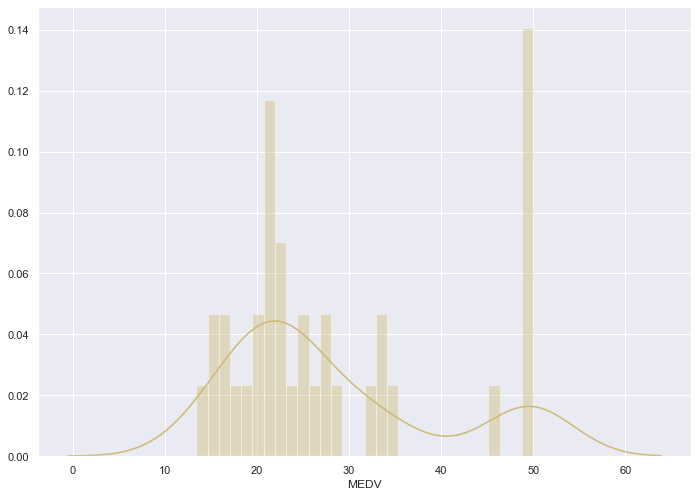

In [21]:
#Getting the info of the houses that face the river
RiverYES = bostondf[bostondf['CHAS']==1]['MEDV']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(RiverYES, color="y", bins=30)
plt.show()

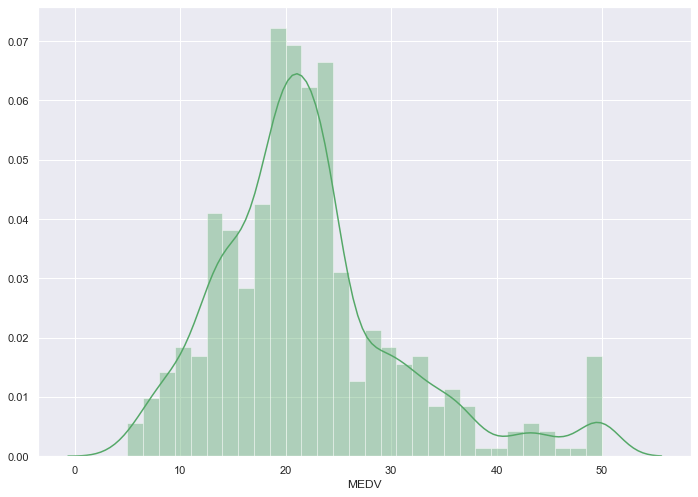

In [22]:
#Getting the info of the houses that face the river
RiverNO = bostondf[bostondf['CHAS']==0]['MEDV']


# Using pyplot to plot the distribution of the houses facing the river

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(RiverNO, color="g", bins=30)
plt.show()

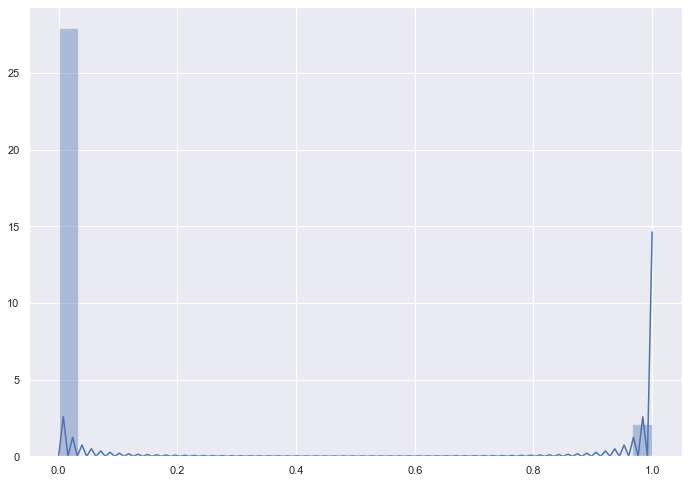

In [23]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(bostondf.iloc[:,3:4], bins=30)
plt.show()

In [24]:
ss.ttest_ind(price, River)

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

The plots above show that the MEDV (Price) variable follows a normal distribution, while the second plot shows that the CHAS (houses in the river border) doesn't follow a normal distribution.

To be able to confirm or refect the nul hipothesis, a Saphiro test is going to be used to tests the null hypothesis that the data was drawn from a normal distribution.

In [25]:
ss.shapiro(price)

(0.9171748757362366, 4.940195786292171e-16)

In [26]:
ss.shapiro(River)

(0.27476072311401367, 2.350467979135232e-40)

One-way ANOVA compares levels (i.e. groups) of a single factor based on single continuous response variable. In this case price would be the continuous variable and CHAS (1 or 0) the factor (categorical).

To continue with the Price - CHAS analysis we are going to divide the data into CHAS 1 (houses in the river border) and CHAS 0 (houses not in the river border)

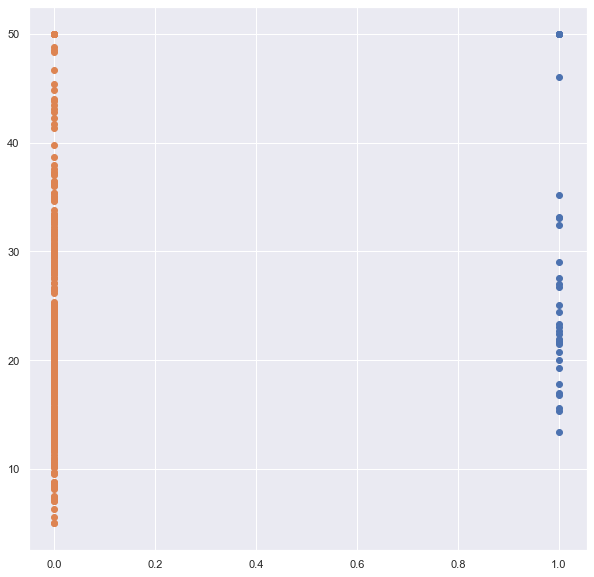

In [27]:
#Splitting the dataset between houses that face the river and those that don't

#Getting the info of the houses that face the river
RiverYES = bostondf[bostondf['CHAS']==1]
#Getting the info of the houses that doesn't face the river
RiverNO = bostondf[bostondf['CHAS']==0]

a = bostondf[bostondf['CHAS']==1][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
b = bostondf[bostondf ['CHAS']==1]['MEDV']
h = bostondf[bostondf ['CHAS']==1]['CHAS']
f = bostondf[bostondf['CHAS']==1][['CHAS', 'MEDV']]

c = bostondf[bostondf['CHAS']==0][['CHAS', 'MEDV', 'CRIM', 'INDUS', 'NOX', 'AGE', 'RAD', 'TAX', 'PTRATIO']]
d = bostondf[bostondf ['CHAS']==0]['MEDV']
i = bostondf[bostondf ['CHAS']==0]['CHAS']
g = bostondf[bostondf['CHAS']==0][['CHAS', 'MEDV']]

#scatter plot with values divided: Houses in the River in blue , houses not in the river in orange
plt.figure(figsize = (10,10))
plt.scatter(h,b)
plt.scatter(i,d)






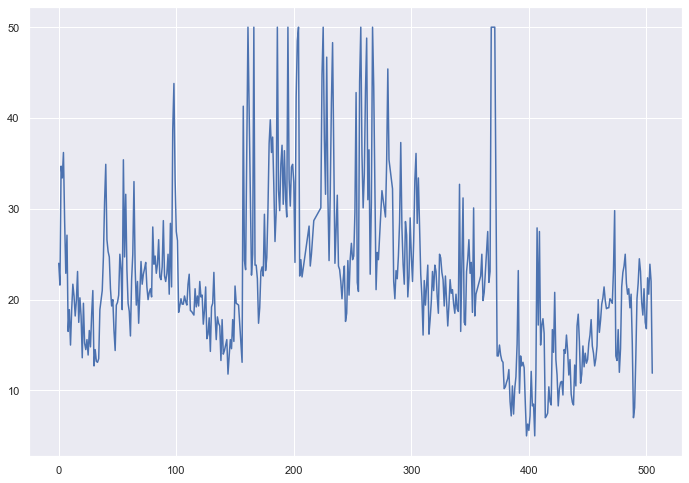

In [28]:
RiverYES = bostondf[bostondf['CHAS']==0]['MEDV']
plt.plot(RiverYES)

In [29]:
#houses facing the river mean
b.mean()

28.44

In [30]:
#houses not facing the river mean
d.mean()

22.093842887473482

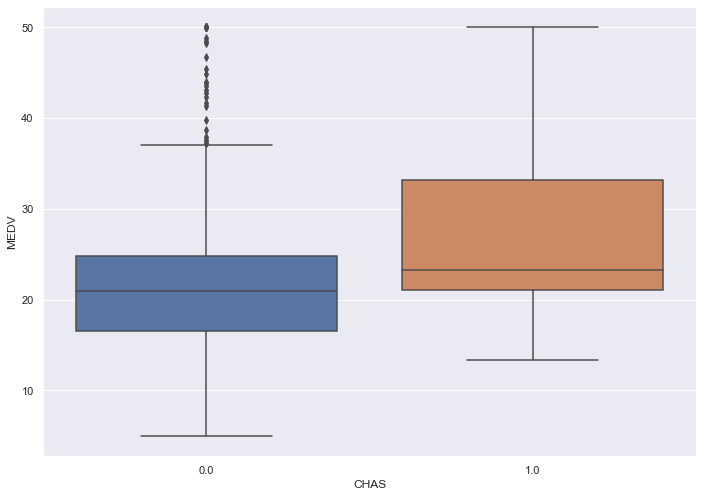

In [31]:
#representing river and no river values in the boxplot
sns.boxplot(x='CHAS', y='MEDV', data=bostondf)


As per the data dispalyed above regarding the mean and the quartiles represented in the box plots, the houses facing the river would most likely have a higher price than the houses not facing the river.

### Predict

## What are neural networks?


Neural networks are a set of algorithms, modeled loosely after the human brain, that are designed to recognize patterns. They interpret sensory data through a kind of machine perception, labeling or clustering raw input. The patterns they recognize are numerical, contained in vectors, into which all real-world data, be it images, sound, text or time series, must be translated.

Neural networks help us cluster and classify. They help to group unlabeled data according to similarities among the example inputs, and they classify data when they have a labeled dataset to train on. 

Neural networks can also extract features that are fed to other algorithms for clustering and classification; so you can think of deep neural networks as components of larger machine-learning applications involving algorithms for reinforcement learning, classification and regression.)

References:
https://skymind.ai/wiki/neural-network

## Keras

Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. It was developed with a focus on enabling fast experimentation.

It is written in Python and supports multiple back-end neural network computation engines.

Keras was created to be user friendly, modular, easy to extend, and to work with Python. The API was “designed for human beings, not machines,”.

Neural layers, cost functions, optimizers, initialization schemes, activation functions, and regularization schemes are all standalone modules that can be combined to create new models. Models are defined in Python code, not separate model configuration files.

References: 
https://keras.io/
https://www.infoworld.com/article/3336192/what-is-keras-the-deep-neural-network-api-explained.html

## Training a neural network

For the purpose of this first prediction, there is going to be a prediction on the LSTAT % lower status of the population and MEDV Price of the house variables as they are the variables that show a higher correlation, in this case a negative correlation.

We have started with a linear regression, with 5 layers of neurons and 30 epochs.
Let's try to increase the number of neurons per layer, eventhough we can see a logaritmic tendence in the data that wouldn't fit the linear line. The neural network in a few iterations stops learning and stops reducing the loss.

Let's change a linear for a sigmoid. It gets better and reduces the loss from the last trial. 

Let's change the optimizer to sgd. Not working (nan)

Adding an extra layer, linear. No effect.

ncreasing the neurons from 30 to 50 in the sigmoid. No effect

Changing a linear for a tanh. Much worst

Changing the first layer to sigmoid. No difference

Creating an extra sigmoid layer. a little worst

Creating another linear. no changes

trying softplus. not much worst, not much better

trying selu activation

changing sotfplus for linear

changing the second sigmoid for linear. Somehow better now 28 loss

changing epoch to 70 no much of a difference

changing batch size to 100. no difference, I can't reduce it more than 28

interchanges selu and sigmoid and much worst. 70 loss

leaving first sigmoid and then 5 linears it learns much quicker but after 10-12 iterations it stops learning

increasing the batch size from 100 to 400 much worst. ended in 78

changed to a batch size of 10 it went back to 28

changed sigmoid by softsign. same result around 28

changed sigmoid by elu. little bit worst. 30

changed elu neurons to 100. same

changed elu for sigmoid. same

augmented the number of neurons to 100 in each layer. same result





References: 
https://keras.io/getting-started/sequential-model-guide/
https://arxiv.org/abs/1706.02515
https://github.com/bioinf-jku/SNNs/blob/master/SelfNormalizingNetworks_CNN_CIFAR10.ipynb

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Epoch 1/30
506/506 [==============================] - 0s 804us/step - loss: 105.5130
Epoch 2/30
506/506 [==============================] - 0s 237us/step - loss: 33.7831
Epoch 3/30
506/506 [==============================] - 0s 243us/step - loss: 33.7870
Epoch 4/30
506/506 [==============================] - 0s 283us/step - loss: 33.7203
Epoch 5/30
506/506 [==============================] - 0s 264us/step - loss: 29.9199
Epoch 6/30
506/506 [==============================] - 0s 229us/step - loss: 31.6077
Epoch 7/30
506/506 [==============================] - 0s 224us/step - loss: 32.2023
Epoch 8/30
506/506 [==============================] - 0s 240us/step - loss: 32.2609
Epoch 9/30
506/506 [==============================] - 0s 245us/step - loss: 31.7191
Epoch 10/30
506/506 [==============================] - 0s 346us/step - loss: 30.6126
Epoch 11/30
506/506 [=================

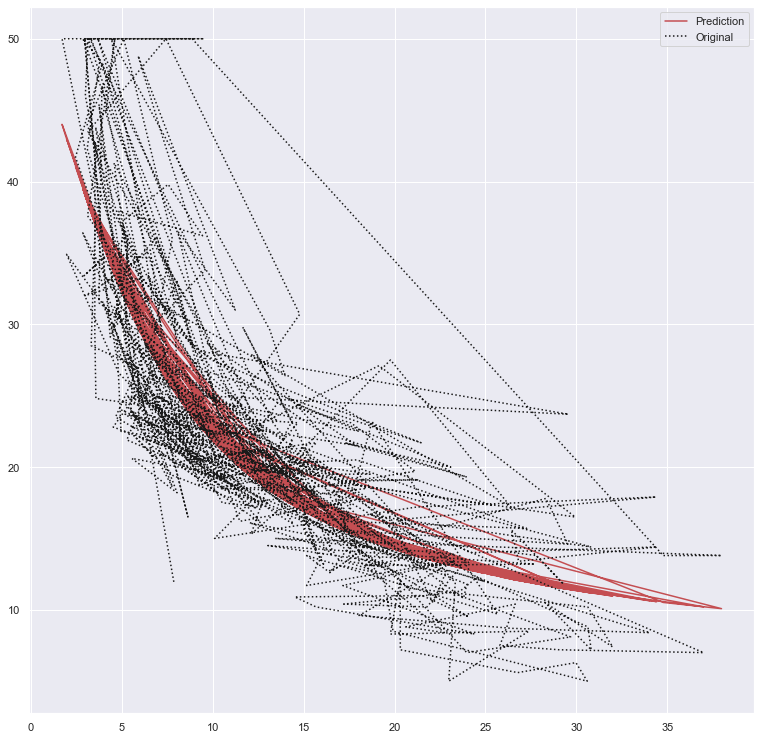

In [32]:
x = bostondf['LSTAT'] 
y = bostondf['MEDV']

#y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(100, input_dim=1, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(100, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x, y, epochs=30, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.figure(figsize = (13,13))
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

For the purpose of this second prediction, we are going to try with a linear prediction to ses if we can get a better output. There is going to be a prediction on the RM Rooms in dweling and MEDV Price of the house variables as they are the variables that show a high correltation, in this case a positive correlation that resembles a linear relationship.

1 layer 1 neuron. high loss number 603
changed to 3 linear layers, first 2 with 10 neurons , third 1 neuron. Improved to 59

Epoch 1/15
506/506 [==============================] - 0s 563us/step - loss: 823.5884
Epoch 2/15
506/506 [==============================] - 0s 282us/step - loss: 562.7617
Epoch 3/15
506/506 [==============================] - 0s 196us/step - loss: 340.7558
Epoch 4/15
506/506 [==============================] - 0s 172us/step - loss: 156.6537
Epoch 5/15
506/506 [==============================] - 0s 198us/step - loss: 72.9639
Epoch 6/15
506/506 [==============================] - 0s 171us/step - loss: 60.9783
Epoch 7/15
506/506 [==============================] - 0s 180us/step - loss: 60.9950
Epoch 8/15
506/506 [==============================] - 0s 179us/step - loss: 61.0177
Epoch 9/15
506/506 [==============================] - 0s 182us/step - loss: 61.0557
Epoch 10/15
506/506 [==============================] - 0s 232us/step - loss: 60.9060
Epoch 11/15
506/506 [==============================] - 0s 267us/step - loss: 60.8867
Epoch 12/15
506/506 [==============================] - 0s 239us/step -

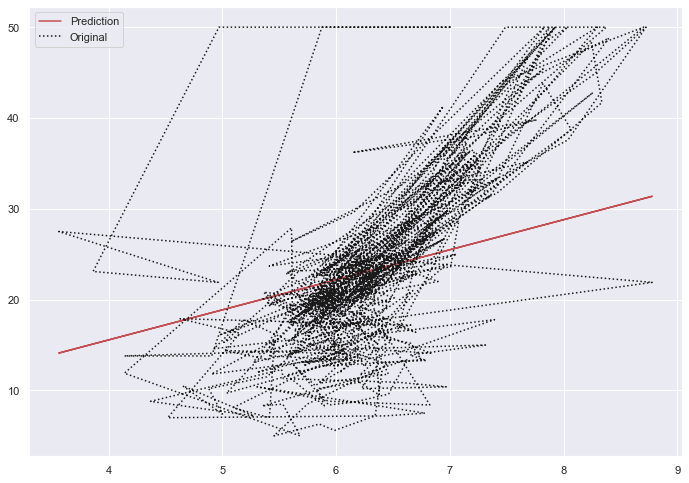

In [33]:
x = bostondf['RM'] 
y = bostondf['MEDV']

#y = y_l
#y = y_p
#y = y_s

# Create a new neural network.
m = kr.models.Sequential()

# Add neurons.
#m.add(kr.layers.Dense(1, input_dim=1, activation="linear"))

# Add neurons
m.add(kr.layers.Dense(10, input_dim=1, activation="linear"))
m.add(kr.layers.Dense(10, activation="linear"))
m.add(kr.layers.Dense(1, activation='linear'))

# Compile the model.
m.compile(loss="mean_squared_error", optimizer="adam")

# Train the model.
m.fit(x, y, epochs=15, batch_size=10)

# Run each x value through the neural network.
p = m.predict(x)

# Plot the values.
plt.plot(x, p, 'r-', label='Prediction')
plt.plot(x, y, 'k:', label='Original')
plt.legend()

In [34]:
#from keras import optimizers
#sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

inputs = bostondf[['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT', 'CHAS']]
output = bostondf['MEDV']


m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=13, activation="sigmoid"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="relu"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(inputs, output, epochs=600, batch_size=200)


Epoch 1/600
506/506 [==============================] - 1s 1ms/step - loss: 572.4316
Epoch 2/600
506/506 [==============================] - 0s 55us/step - loss: 520.7482
Epoch 3/600
506/506 [==============================] - 0s 64us/step - loss: 423.3457
Epoch 4/600
506/506 [==============================] - 0s 60us/step - loss: 265.4075
Epoch 5/600
506/506 [==============================] - 0s 69us/step - loss: 107.2196
Epoch 6/600
506/506 [==============================] - 0s 90us/step - loss: 164.4720
Epoch 7/600
506/506 [==============================] - 0s 75us/step - loss: 102.2392
Epoch 8/600
506/506 [==============================] - 0s 90us/step - loss: 81.8703
Epoch 9/600
506/506 [==============================] - 0s 62us/step - loss: 104.2954
Epoch 10/600
506/506 [==============================] - 0s 60us/step - loss: 96.3169
Epoch 11/600
506/506 [==============================] - 0s 51us/step - loss: 73.0920
Epoch 12/600
506/506 [==============================] - 0s 80us/ste

506/506 [==============================] - 0s 53us/step - loss: 16.8535
Epoch 98/600
506/506 [==============================] - 0s 45us/step - loss: 16.7640
Epoch 99/600
506/506 [==============================] - 0s 43us/step - loss: 16.7463
Epoch 100/600
506/506 [==============================] - 0s 42us/step - loss: 15.7939
Epoch 101/600
506/506 [==============================] - 0s 37us/step - loss: 15.8176
Epoch 102/600
506/506 [==============================] - 0s 50us/step - loss: 15.6181
Epoch 103/600
506/506 [==============================] - 0s 65us/step - loss: 16.8579
Epoch 104/600
506/506 [==============================] - 0s 52us/step - loss: 17.9920
Epoch 105/600
506/506 [==============================] - 0s 42us/step - loss: 17.2684
Epoch 106/600
506/506 [==============================] - 0s 46us/step - loss: 16.1236
Epoch 107/600
506/506 [==============================] - 0s 43us/step - loss: 15.0988
Epoch 108/600
506/506 [==============================] - 0s 48us/step 

506/506 [==============================] - 0s 34us/step - loss: 11.8946
Epoch 193/600
506/506 [==============================] - 0s 48us/step - loss: 11.1724
Epoch 194/600
506/506 [==============================] - 0s 45us/step - loss: 11.2765
Epoch 195/600
506/506 [==============================] - 0s 37us/step - loss: 11.2468
Epoch 196/600
506/506 [==============================] - 0s 44us/step - loss: 11.2626
Epoch 197/600
506/506 [==============================] - 0s 44us/step - loss: 11.1631
Epoch 198/600
506/506 [==============================] - 0s 43us/step - loss: 11.1209
Epoch 199/600
506/506 [==============================] - 0s 46us/step - loss: 11.2194
Epoch 200/600
506/506 [==============================] - 0s 57us/step - loss: 11.2751
Epoch 201/600
506/506 [==============================] - 0s 63us/step - loss: 11.1489
Epoch 202/600
506/506 [==============================] - 0s 58us/step - loss: 13.2276
Epoch 203/600
506/506 [==============================] - 0s 52us/ste

506/506 [==============================] - 0s 37us/step - loss: 9.6870
Epoch 288/600
506/506 [==============================] - 0s 36us/step - loss: 9.9123
Epoch 289/600
506/506 [==============================] - 0s 40us/step - loss: 9.6289
Epoch 290/600
506/506 [==============================] - 0s 37us/step - loss: 9.6607
Epoch 291/600
506/506 [==============================] - 0s 33us/step - loss: 10.0604
Epoch 292/600
506/506 [==============================] - 0s 39us/step - loss: 11.1061
Epoch 293/600
506/506 [==============================] - 0s 33us/step - loss: 9.9463
Epoch 294/600
506/506 [==============================] - 0s 37us/step - loss: 10.5180
Epoch 295/600
506/506 [==============================] - 0s 40us/step - loss: 10.3791
Epoch 296/600
506/506 [==============================] - 0s 36us/step - loss: 10.1696
Epoch 297/600
506/506 [==============================] - 0s 42us/step - loss: 9.9510
Epoch 298/600
506/506 [==============================] - 0s 36us/step - lo

506/506 [==============================] - 0s 44us/step - loss: 8.8427
Epoch 384/600
506/506 [==============================] - 0s 37us/step - loss: 9.5414
Epoch 385/600
506/506 [==============================] - 0s 41us/step - loss: 9.5428
Epoch 386/600
506/506 [==============================] - 0s 34us/step - loss: 9.5834
Epoch 387/600
506/506 [==============================] - 0s 37us/step - loss: 8.8650
Epoch 388/600
506/506 [==============================] - 0s 35us/step - loss: 8.5648
Epoch 389/600
506/506 [==============================] - 0s 38us/step - loss: 8.8543
Epoch 390/600
506/506 [==============================] - 0s 34us/step - loss: 9.5016
Epoch 391/600
506/506 [==============================] - 0s 35us/step - loss: 8.7758
Epoch 392/600
506/506 [==============================] - 0s 36us/step - loss: 8.5490
Epoch 393/600
506/506 [==============================] - 0s 37us/step - loss: 8.2618
Epoch 394/600
506/506 [==============================] - 0s 35us/step - loss: 8

506/506 [==============================] - 0s 38us/step - loss: 10.8143
Epoch 480/600
506/506 [==============================] - 0s 36us/step - loss: 7.8972
Epoch 481/600
506/506 [==============================] - 0s 36us/step - loss: 7.9190
Epoch 482/600
506/506 [==============================] - 0s 33us/step - loss: 7.2229
Epoch 483/600
506/506 [==============================] - 0s 35us/step - loss: 7.3620
Epoch 484/600
506/506 [==============================] - 0s 38us/step - loss: 6.8819
Epoch 485/600
506/506 [==============================] - 0s 38us/step - loss: 7.2844
Epoch 486/600
506/506 [==============================] - 0s 33us/step - loss: 6.9376
Epoch 487/600
506/506 [==============================] - 0s 35us/step - loss: 6.8454
Epoch 488/600
506/506 [==============================] - 0s 41us/step - loss: 7.0627
Epoch 489/600
506/506 [==============================] - 0s 42us/step - loss: 6.7896
Epoch 490/600
506/506 [==============================] - 0s 39us/step - loss: 

506/506 [==============================] - 0s 42us/step - loss: 5.8861
Epoch 576/600
506/506 [==============================] - 0s 48us/step - loss: 5.6426
Epoch 577/600
506/506 [==============================] - 0s 49us/step - loss: 5.6078
Epoch 578/600
506/506 [==============================] - 0s 42us/step - loss: 5.5215
Epoch 579/600
506/506 [==============================] - 0s 37us/step - loss: 5.3449
Epoch 580/600
506/506 [==============================] - 0s 37us/step - loss: 5.5569
Epoch 581/600
506/506 [==============================] - 0s 44us/step - loss: 5.5676
Epoch 582/600
506/506 [==============================] - 0s 41us/step - loss: 5.4113
Epoch 583/600
506/506 [==============================] - 0s 36us/step - loss: 5.4881
Epoch 584/600
506/506 [==============================] - 0s 41us/step - loss: 5.6116
Epoch 585/600
506/506 [==============================] - 0s 40us/step - loss: 5.7346
Epoch 586/600
506/506 [==============================] - 0s 43us/step - loss: 5

### Difference between epoch and Batch
**Epoch**
One cycle through the entire training dataset is called a training epoch.

The number of epochs is a hyperparameter that defines the number times that the learning algorithm will work through the entire training dataset.

**Batch**
The batch size is a number of samples processed before the model is updated.

The batch size is a hyperparameter that defines the number of samples to work through before updating the internal model parameters.


### Optimizers:
**Gradient descent** is an optimization algorithm often used for finding the weights or coefficients of machine learning algorithms, such as artificial neural networks and logistic regression.

It works by having the model make predictions on training data and using the error on the predictions to update the model in such a way as to reduce the error.

Gradient descent can vary in terms of the number of training patterns used to calculate error; that is in turn used to update the model.

The number of patterns used to calculate the error includes how stable the gradient is that is used to update the model. We will see that there is a tension in gradient descent configurations of computational efficiency and the fidelity of the error gradient.

The three main flavors of gradient descent are batch, stochastic, and mini-batch.

**Stochastic gradient descent**, often abbreviated SGD, is a variation of the gradient descent algorithm that calculates the error and updates the model for each example in the training dataset.

**Batch gradient descent** is a variation of the gradient descent algorithm that calculates the error for each example in the training dataset, but only updates the model after all training examples have been evaluated.

**Mini-batch gradient descent** is a variation of the gradient descent algorithm that splits the training dataset into small batches that are used to calculate model error and update model coefficients.

Implementations may choose to sum the gradient over the mini-batch which further reduces the variance of the gradient.

Mini-batch gradient descent seeks to find a balance between the robustness of stochastic gradient descent and the efficiency of batch gradient descent. It is the most common implementation of gradient descent used in the field of deep learning.


References:
https://towardsdatascience.com/the-3-best-optimization-methods-in-neural-networks-40879c887873
https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/


In [35]:
np.around(m.predict(inputs))

array([[30.],
       [22.],
       [32.],
       [36.],
       [35.],
       [33.],
       [21.],
       [21.],
       [16.],
       [21.],
       [20.],
       [22.],
       [22.],
       [23.],
       [20.],
       [23.],
       [26.],
       [19.],
       [20.],
       [21.],
       [15.],
       [19.],
       [18.],
       [15.],
       [18.],
       [16.],
       [18.],
       [15.],
       [19.],
       [20.],
       [15.],
       [16.],
       [15.],
       [16.],
       [14.],
       [22.],
       [22.],
       [24.],
       [25.],
       [30.],
       [36.],
       [28.],
       [26.],
       [25.],
       [21.],
       [21.],
       [20.],
       [19.],
       [17.],
       [20.],
       [22.],
       [24.],
       [28.],
       [25.],
       [20.],
       [36.],
       [26.],
       [34.],
       [25.],
       [23.],
       [22.],
       [20.],
       [24.],
       [23.],
       [34.],
       [29.],
       [21.],
       [24.],
       [20.],
       [22.],
       [25.],
      

In [36]:
output.as_matrix()

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [37]:
#difference between 2 arrays to calculate the mean squared error
np.sqrt(np.sum(m.predict(inputs).T - output.as_matrix())**2)

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


411.8594721794128

In [38]:
#from keras import optimizers
#sgd = optimizers.SGD(lr=0.01, clipnorm=1.)

inputs = bostondf[['CRIM', 'LSTAT', 'RM','DIS']]
output = bostondf['MEDV']


m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=4, activation="linear"))
m.add(kr.layers.Dense(10, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(inputs, output, epochs=400, batch_size=64)

Epoch 1/400
506/506 [==============================] - 0s 562us/step - loss: 425.5370
Epoch 2/400
506/506 [==============================] - 0s 43us/step - loss: 360.9824
Epoch 3/400
506/506 [==============================] - 0s 35us/step - loss: 304.4513
Epoch 4/400
506/506 [==============================] - 0s 47us/step - loss: 253.8750
Epoch 5/400
506/506 [==============================] - 0s 57us/step - loss: 213.6712
Epoch 6/400
506/506 [==============================] - 0s 50us/step - loss: 183.5743
Epoch 7/400
506/506 [==============================] - 0s 52us/step - loss: 160.6790
Epoch 8/400
506/506 [==============================] - 0s 49us/step - loss: 145.7160
Epoch 9/400
506/506 [==============================] - 0s 48us/step - loss: 135.0178
Epoch 10/400
506/506 [==============================] - 0s 48us/step - loss: 126.4216
Epoch 11/400
506/506 [==============================] - 0s 45us/step - loss: 119.2339
Epoch 12/400
506/506 [==============================] - 0s 40u

506/506 [==============================] - 0s 45us/step - loss: 22.0779
Epoch 98/400
506/506 [==============================] - 0s 42us/step - loss: 22.0025
Epoch 99/400
506/506 [==============================] - 0s 38us/step - loss: 21.9677
Epoch 100/400
506/506 [==============================] - 0s 39us/step - loss: 21.8805
Epoch 101/400
506/506 [==============================] - 0s 41us/step - loss: 21.8788
Epoch 102/400
506/506 [==============================] - 0s 35us/step - loss: 21.8171
Epoch 103/400
506/506 [==============================] - 0s 34us/step - loss: 21.8285
Epoch 104/400
506/506 [==============================] - 0s 38us/step - loss: 21.7300
Epoch 105/400
506/506 [==============================] - 0s 36us/step - loss: 21.6647
Epoch 106/400
506/506 [==============================] - 0s 35us/step - loss: 21.6481
Epoch 107/400
506/506 [==============================] - 0s 38us/step - loss: 21.5932
Epoch 108/400
506/506 [==============================] - 0s 32us/step 

506/506 [==============================] - 0s 52us/step - loss: 20.3257
Epoch 193/400
506/506 [==============================] - 0s 38us/step - loss: 20.3570
Epoch 194/400
506/506 [==============================] - 0s 47us/step - loss: 20.3383
Epoch 195/400
506/506 [==============================] - 0s 44us/step - loss: 20.3334
Epoch 196/400
506/506 [==============================] - 0s 45us/step - loss: 20.3090
Epoch 197/400
506/506 [==============================] - 0s 37us/step - loss: 20.3662
Epoch 198/400
506/506 [==============================] - 0s 44us/step - loss: 20.3516
Epoch 199/400
506/506 [==============================] - 0s 45us/step - loss: 20.2941
Epoch 200/400
506/506 [==============================] - 0s 43us/step - loss: 20.3030
Epoch 201/400
506/506 [==============================] - 0s 45us/step - loss: 20.2876
Epoch 202/400
506/506 [==============================] - 0s 50us/step - loss: 20.2815
Epoch 203/400
506/506 [==============================] - 0s 45us/ste

506/506 [==============================] - 0s 40us/step - loss: 19.8967
Epoch 288/400
506/506 [==============================] - 0s 36us/step - loss: 19.8720
Epoch 289/400
506/506 [==============================] - 0s 40us/step - loss: 19.8654
Epoch 290/400
506/506 [==============================] - 0s 38us/step - loss: 20.0309
Epoch 291/400
506/506 [==============================] - 0s 40us/step - loss: 20.2550
Epoch 292/400
506/506 [==============================] - 0s 36us/step - loss: 19.8067
Epoch 293/400
506/506 [==============================] - 0s 40us/step - loss: 19.9974
Epoch 294/400
506/506 [==============================] - 0s 41us/step - loss: 19.8472
Epoch 295/400
506/506 [==============================] - 0s 43us/step - loss: 19.8906
Epoch 296/400
506/506 [==============================] - 0s 38us/step - loss: 19.8712
Epoch 297/400
506/506 [==============================] - 0s 47us/step - loss: 19.9486
Epoch 298/400
506/506 [==============================] - 0s 57us/ste

Epoch 382/400
506/506 [==============================] - 0s 56us/step - loss: 19.9025
Epoch 383/400
506/506 [==============================] - 0s 46us/step - loss: 19.9449
Epoch 384/400
506/506 [==============================] - 0s 43us/step - loss: 20.0150
Epoch 385/400
506/506 [==============================] - 0s 58us/step - loss: 19.7896
Epoch 386/400
506/506 [==============================] - 0s 47us/step - loss: 19.7562
Epoch 387/400
506/506 [==============================] - 0s 44us/step - loss: 19.8932
Epoch 388/400
506/506 [==============================] - 0s 52us/step - loss: 19.7413
Epoch 389/400
506/506 [==============================] - 0s 44us/step - loss: 19.7550
Epoch 390/400
506/506 [==============================] - 0s 39us/step - loss: 19.7348
Epoch 391/400
506/506 [==============================] - 0s 34us/step - loss: 19.8235
Epoch 392/400
506/506 [==============================] - 0s 44us/step - loss: 19.7869
Epoch 393/400
506/506 [==============================]

In [39]:
x_train, x_test, y_train, y_test = mod.train_test_split(x, y, test_size=0.3)


In [40]:
m = kr.models.Sequential()

m.add(kr.layers.Dense(20, input_dim=13, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(x_train, y_train, epochs=100, batch_size=10)



ValueError: Error when checking input: expected dense_21_input to have shape (13,) but got array with shape (1,)

In [50]:
#pre-procesing

inputs = bostondf[['CRIM', 'LSTAT', 'RM','DIS']]
output = bostondf['MEDV']

x = bostondf[['CRIM', 'LSTAT', 'RM','DIS']]
x

xscale = pd.DataFrame(pre.scale(x), columns=x.columns)
xscale


#neural network

m = kr.models.Sequential()

m.add(kr.layers.Dense(100, input_dim=4, activation="linear"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(100, activation="relu"))
m.add(kr.layers.Dense(1, activation="linear"))

m.compile(loss="mean_squared_error", optimizer="adam")

m.fit(xscale, output, epochs=400, batch_size=64)





Epoch 1/400
506/506 [==============================] - 0s 762us/step - loss: 571.6673
Epoch 2/400
506/506 [==============================] - 0s 67us/step - loss: 504.4368
Epoch 3/400
506/506 [==============================] - 0s 60us/step - loss: 371.1725
Epoch 4/400
506/506 [==============================] - 0s 55us/step - loss: 182.2975
Epoch 5/400
506/506 [==============================] - 0s 63us/step - loss: 110.9900
Epoch 6/400
506/506 [==============================] - 0s 65us/step - loss: 66.3758
Epoch 7/400
506/506 [==============================] - 0s 67us/step - loss: 46.7782
Epoch 8/400
506/506 [==============================] - 0s 78us/step - loss: 36.3680
Epoch 9/400
506/506 [==============================] - 0s 55us/step - loss: 31.8743
Epoch 10/400
506/506 [==============================] - 0s 64us/step - loss: 30.0872
Epoch 11/400
506/506 [==============================] - 0s 61us/step - loss: 26.6527
Epoch 12/400
506/506 [==============================] - 0s 51us/step

506/506 [==============================] - 0s 69us/step - loss: 10.1790
Epoch 98/400
506/506 [==============================] - 0s 68us/step - loss: 10.2355
Epoch 99/400
506/506 [==============================] - 0s 63us/step - loss: 10.1851
Epoch 100/400
506/506 [==============================] - 0s 74us/step - loss: 10.2454
Epoch 101/400
506/506 [==============================] - 0s 74us/step - loss: 10.1924
Epoch 102/400
506/506 [==============================] - 0s 73us/step - loss: 9.9142
Epoch 103/400
506/506 [==============================] - 0s 61us/step - loss: 10.1296
Epoch 104/400
506/506 [==============================] - 0s 67us/step - loss: 9.9937
Epoch 105/400
506/506 [==============================] - 0s 73us/step - loss: 10.2975
Epoch 106/400
506/506 [==============================] - 0s 71us/step - loss: 10.4843
Epoch 107/400
506/506 [==============================] - 0s 56us/step - loss: 10.1439
Epoch 108/400
506/506 [==============================] - 0s 72us/step - 

506/506 [==============================] - 0s 62us/step - loss: 7.1205
Epoch 194/400
506/506 [==============================] - 0s 58us/step - loss: 7.1413
Epoch 195/400
506/506 [==============================] - 0s 80us/step - loss: 7.0256
Epoch 196/400
506/506 [==============================] - 0s 55us/step - loss: 7.0631
Epoch 197/400
506/506 [==============================] - 0s 48us/step - loss: 6.8844
Epoch 198/400
506/506 [==============================] - 0s 68us/step - loss: 6.6802
Epoch 199/400
506/506 [==============================] - 0s 81us/step - loss: 6.8150
Epoch 200/400
506/506 [==============================] - 0s 63us/step - loss: 6.7930
Epoch 201/400
506/506 [==============================] - 0s 66us/step - loss: 6.8530
Epoch 202/400
506/506 [==============================] - 0s 70us/step - loss: 7.2379
Epoch 203/400
506/506 [==============================] - 0s 69us/step - loss: 7.0705
Epoch 204/400
506/506 [==============================] - 0s 66us/step - loss: 6

506/506 [==============================] - 0s 67us/step - loss: 5.5022
Epoch 290/400
506/506 [==============================] - 0s 59us/step - loss: 5.4387
Epoch 291/400
506/506 [==============================] - 0s 64us/step - loss: 5.4220
Epoch 292/400
506/506 [==============================] - 0s 65us/step - loss: 5.6846
Epoch 293/400
506/506 [==============================] - 0s 70us/step - loss: 5.3599
Epoch 294/400
506/506 [==============================] - 0s 60us/step - loss: 5.1313
Epoch 295/400
506/506 [==============================] - 0s 60us/step - loss: 5.2833
Epoch 296/400
506/506 [==============================] - 0s 57us/step - loss: 5.3711
Epoch 297/400
506/506 [==============================] - 0s 59us/step - loss: 5.4852
Epoch 298/400
506/506 [==============================] - 0s 51us/step - loss: 5.6733
Epoch 299/400
506/506 [==============================] - 0s 66us/step - loss: 5.5948
Epoch 300/400
506/506 [==============================] - 0s 52us/step - loss: 5

506/506 [==============================] - 0s 62us/step - loss: 4.1964
Epoch 386/400
506/506 [==============================] - 0s 57us/step - loss: 4.5492
Epoch 387/400
506/506 [==============================] - 0s 65us/step - loss: 4.7623
Epoch 388/400
506/506 [==============================] - 0s 54us/step - loss: 4.9944
Epoch 389/400
506/506 [==============================] - 0s 61us/step - loss: 4.9927
Epoch 390/400
506/506 [==============================] - 0s 68us/step - loss: 4.4566
Epoch 391/400
506/506 [==============================] - 0s 63us/step - loss: 4.4013
Epoch 392/400
506/506 [==============================] - ETA: 0s - loss: 4.608 - 0s 69us/step - loss: 4.4879
Epoch 393/400
506/506 [==============================] - 0s 72us/step - loss: 4.4697
Epoch 394/400
506/506 [==============================] - 0s 66us/step - loss: 4.3140
Epoch 395/400
506/506 [==============================] - 0s 69us/step - loss: 4.4150
Epoch 396/400
506/506 [==============================] 